<a href="https://colab.research.google.com/github/AeMcRa/Datascience-things/blob/main/AedaRamoU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copied libraries:

In [1]:
!pip install "preliz"


#Importing libraries! This code is copied from the notes.

import preliz as pz


import numpy as np
import arviz as az
import pymc as pm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 633.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 10.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


# Topic Question:
What is the true probability that I(Aedan Ramos) will beat Cyrus Rule in any given in-person, competative game of Super Smash Brothers Ultimate(SSBU)?

# Super Smash Brothers Ultimate:
Cyrus Rule & I are both amongst the top 4 SSBU players at LASA, making the result of a match between us very relevant in the outcome of any intraschool competition.

We have had a rivalry within the game for just over 3 years, and have a large dataset of match results from online play which I will use as a prior, to be explained later.

In SSBU, each player selects a character(or random) then must use that character's specific moveset to knock the opposing player's character off the map through repeated hits. Players lose a life (called stocks) when thier character is knocked off the map, and win when the opponent has lost all of thier stocks. The percentage of matches that I win will be our metric to determine who is likely to win any given match.

# Assumptions: Modeling Online Winrate:
After consulting the stored online game data for number of games played & number of games won, we see that out of 1276 played games, I won 488

Lets model this using Beta distribution with the formula as follows:

$p(θ) = Beta(α=488, β=788)=\frac{1275!}{487!787!}θ^{487}(1-θ)^{787}$.



<Axes: >

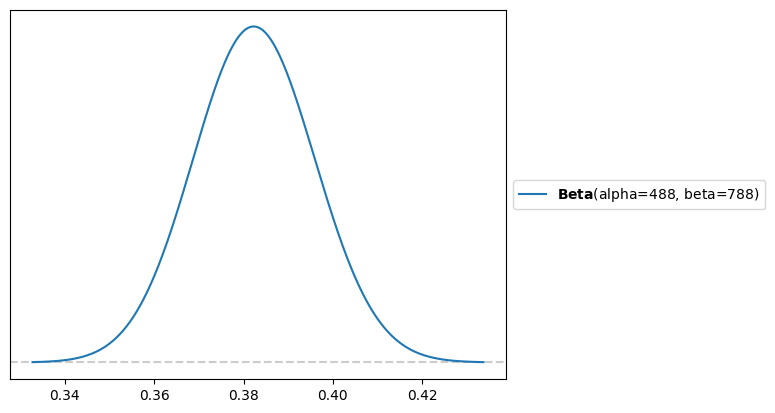

In [2]:
#Beta distribution of prior dataset. Since the total number of games played is 1276 and I won 488, the Alpha is 488 & the Beta is 788
pz.Beta(alpha=488,beta=788).plot_pdf()

# Quanitfying this data
 Since we are trying to find future win% lets derive mean, median and mode to get a concrete number.

In [3]:
#Mean Median Mode calculations. Copied from the notes.
wrData = pz.Beta(alpha=488, beta=788)

wrDataMode = (wrData.alpha -1)/(wrData.alpha + wrData.beta -2)

wrData.mean(), wrData.median(), wrDataMode

(0.3824451410658307, 0.38238370325165294, 0.38226059654631084)

# Why This Data Is Bad Actually
Ok, so we used what seems like a perfectly good data set to derive a seemingly perfectly good win% for future games. So why is this a prior anyways? Well you see, there are a multitude of factors that differentiate the data collected from the outcome of an actual in-person, competative match. I will focus on the 3 primary factors that most of the others fall under in some way or another.



1. Data Collection Timeline

  The first issue with this data set is that the data was collected over a very long time period. These are the records of ~ 3 years worth of matches, and as we improve & play more, our relative skill levels are going to shift. This is also relevant because of character selection over this time period, which leads us into the next point.

2. Character Selection

  As one plays and improves at SSBU, their character of choice, or 'main' is bound to change. Over the 3 year period of the prior data, I switched characters over a dozen times, learning and practicing with a variety of disparate playstyles, wheras Cyrus tended to stick to the big characters with somewhat similar playstyles. I also tended to play with a larger pool of characters during this time period, so for any given match I would be vastly outclassed in character experience when compared to Cyrus. In the present, now that my scope of characters has narrowed and I stick to just a few that I practice more heavily, our experience with our respective characters has proporitonally evened out. In a competative scenario, we are likely to pick the characters that we are best at, which also harms the relevancy of the online games in which we both chose random, or messed around with new characters. In addition, some characters have an advantage in online play, which leads us to our final point.

3. Online Play

  The online environment of play is vastly different to the in-person environment of more competitive play. SSBU uses Delay Netcode, which can cause buffering and reduces the effectiveness of play based around precise inputs. As Cyrus primarily plays the big, slow characters whos equally big and slow hits benefit greatly from the reduced reaction time and increased difficulty to punish his mistakes during online play. As such, in the online environment, he has an advantage over the characters that I tend to play. Additionally, he has a tendancy to fall asleep during online games, which skews the accuracy of data in regards to in person play where the probability of him falling asleep mid match is greatly reduced.


due to these factors, I think this data is misrepresetnative of my actual odds of winning a competative, offline match, and the distribution for my prior should be much wider. Lets recalculate with a proportional formula that accounts for this:

$p(θ) = Beta(α=2.44, β=3.96)=\frac{5.4!}{1.44!2.96!}θ^{1.44}(1-θ)^{2.96}$.

<Axes: >

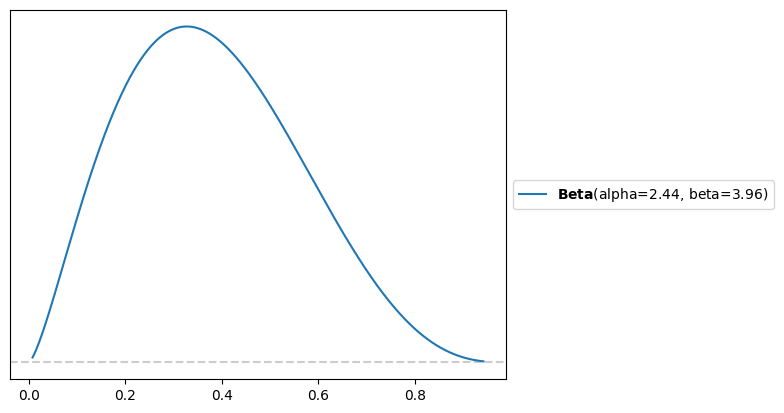

In [4]:
#Beta distribution using smaller numbers to represent the uncertainty in winrate
pz.Beta(alpha=2.44,beta=3.96).plot_pdf()

In [5]:
#Mean Median & Mode for
wrData = pz.Beta(alpha=2.44, beta=3.96)

wrDataMode = (wrData.alpha -1)/(wrData.alpha + wrData.beta -2)

wrData.mean(), wrData.median(), wrDataMode

(0.38125, 0.3681953362175646, 0.3272727272727272)

# Observed Data:


After playing 17 matches of SSBU with Cyrus, I won 8 of them.

lets find the likelihood that out of 17 matches, I won 8 of them using the following formula:

$p(y|θ)=Binomial(n=17,k=8,θ)=\frac{17!}{(17-8)!8!}θ^{8}(1-θ)^{9}$

<Axes: >

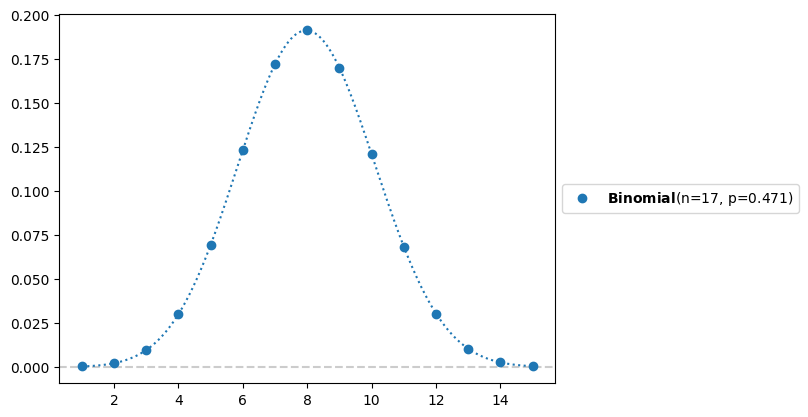

In [6]:
pz.Binomial(n=17, p = 8/17).plot_pdf()

Lets use this to make a prediction of my true winrate in a competative, in-person game given that I have won 8/17 competative, in-person games.

For this we will use our formulas:
$p(θ) = Beta(α=2.44, β=3.96)=\frac{5.4!}{1.44!2.96!}θ^{1.44}(1-θ)^{2.96}$.

$p(y|θ)=Binomial(n=17,k=8,θ)=\frac{17!}{(17-8)!8!}θ^{8}(1-θ)^{9}$

to find $p(θ|y)$ as follows:

$p(θ|y) ∝ p(y|θ)p(θ) = Beta(α_{new}=2.44+8,β_{new}=17-8+3.96)$




<Axes: >

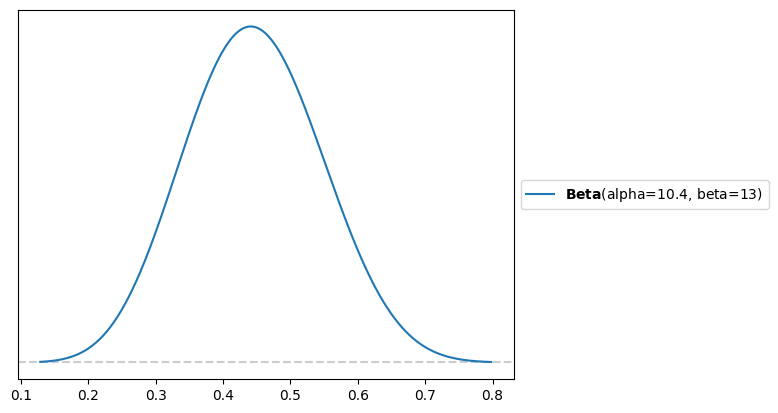

In [9]:
#code copied from notes
#posterior calculation
alpha_old = 2.44
beta_old = 3.96

#likelihood info, or data from match results
k = 8 #wins
n = 17 #total matches

#'analytic' here means that we found the solution directly using a closed form
# mathematical formula
analytic_FT = pz.Beta(alpha = alpha_old + k,beta = beta_old + n - k )

analytic_FT.plot_pdf()

# Pymc

Now that we have our prior, likelihood, and posterior, lets put it into a pymc model

<Axes: title={'center': 'θ'}>

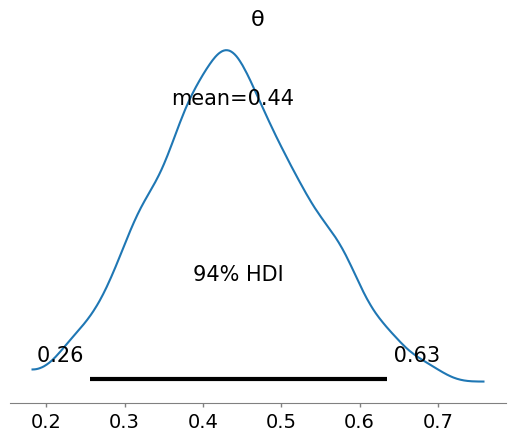

In [11]:
#copied from notes

import pymc as pm

#Wins
WR_wins = np.repeat(1, 8)

#Losses
WR_losses = np.repeat(0, 9)

#combine wins & losses into one array
WR_data = np.concatenate( [WR_wins,WR_losses] )


with pm.Model() as ssbu_WR_model:
  #we define our prior with the wins and losses from online
  θ = pm.Beta('θ' , alpha = 2.44 , beta = 3.96)

  #we define our likelihood, which is how we process the matches that I have won
  y = pm.Bernoulli('y', p = θ, observed = WR_data)

  #sample from posterior
  idata_WR = pm.sample(1000)


import arviz as az
#visualization of samples from posterior
az.plot_posterior(idata_WR)

# Making predictions

In order to actually answer the question, we need to make our model actually predict the outcome of a match.



In [12]:
#The below function needs to know two things in order to make predictions:
#-the samples from the posterior; these are stored in idata_WR
#-the model that generated those samples, which we called ssbu_WR_model
# The last input tells the function to store those predictions in idata_WR

pm.sample_posterior_predictive(idata_WR, model=ssbu_WR_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [14]:
#copied from notes
#stack the two MCMC chains together for a total of 2000 predictions
stacked_WR = az.extract(idata_WR, group="posterior_predictive")


#WRs as a batch of 17, and it uses each batch of 17 to calculate a WR, θ
stacked_WR.sel(sample=0).sel(draw=0).y.to_series().values

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

# Conclusion
The first number in our array is 1, therefore I win any given match! In all seriousness, we saw earlier that our mean is 44%, so I am more likely to lose any given match than to win.

In the prediction, we see a lot of clumping, which would likely not happen as much in a given series of matches. SSBU is as much about adaptation as it is about base skill. In reality, a series of matches would be much more back and forth as we adapt to each other's character selection and play on any given day. During data collection, Cyrus was performing very well on a character that is quite effective against the majority of my character retinue. In the later matches, I adapted by playing with a character that performs well versus the character he was playing as, and if we continued data collection, it is quite possible that the data would have swung in my favor.

If we had collected data in the range of hundreds, or even thousands of matches then even more factors may come into play, including mental endurance, and not falling asleep, which I believe I have the edge in.

We come across an issue where in order to collect data that is representative of a competative match that we would see in an in person tournament, we necessarily need to isolate collections so other factors don't come into play, however this unfortunately limits the ammount of data that can be collected.

To answer the question: What is the true probability that I(Aedan Ramos) will beat Cyrus Rule in any given in-person, competative game of Super Smash Brothers Ultimate(SSBU)? I would argue that it is just under 50%.